<a href="https://colab.research.google.com/github/SamuelMiquirice/-TrabalhoDaDisciplinaDeMetodologiaDePesquisa_De_Samuel_RA202305/blob/main/Trabalho2_RA202305_SamuelAntonioMiquiriceDomindos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importa Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


#### Importa as bibliotecas do Python

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
pd.set_option('display.expand_frame_repr', False)

#### Ler o arquivo CSV

In [ ]:
### Load the cv
pacientes = pd.read_csv("/content/drive/MyDrive/10k_synthea_covid19_csv/patients.csv")

### Show informações sobre o csv
print(f"O arquivo csv tem {pacientes.shape[0]} linhas e {pacientes.shape[1]} colunas")

### Imprime apenas as primeiras 10 linhas 
print(f"Imprimindo apenas as {10} primeiras linhas")

pacientes.head(10)


O arquivo csv tem 12352 linhas e 25 colunas
Imprimindo apenas as 10 primeiras linhas


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,...,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,...,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,...,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04
5,f58bf921-cba1-475a-b4f8-dc6fa3b8f89c,2019-06-12,NaN,999-81-4349,NaN,NaN,NaN,Karyn217,Mueller846,NaN,...,New Bedford Massachusetts US,570 Abshire Forge Suite 32,Colrain,Massachusetts,Franklin County,NaN,42.740220,-72.722648,22940.00,893.28
6,b9fd2dd8-181b-494b-ab15-e9f286d668d9,1983-12-12,NaN,999-73-5361,S99960247,X68109354X,Mr.,Milo271,Feil794,NaN,...,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531,793335.55,2866.36
7,d22592ac-552f-4ecd-a63d-7663d77ce9ba,1989-06-22,NaN,999-76-6866,S99979025,X42374914X,Mr.,José Eduardo181,Gómez206,NaN,...,Marigot Saint Andrew Parish DM,427 Balistreri Way Unit 19,Chicopee,Massachusetts,Hampden County,1013.0,42.228354,-72.562951,709544.18,3023.04
8,28658715-b770-4576-9a81-fbb2282a98ea,1991-07-31,NaN,999-74-9712,S99966383,X54776571X,Mrs.,Karyn217,Metz686,NaN,...,Belmont Massachusetts US,181 Feest Passage Suite 64,Medfield,Massachusetts,Norfolk County,2052.0,42.138719,-71.297255,730953.33,4214.64
9,055ae6fc-7e18-4a39-8058-64082ca6d515,2005-01-16,NaN,999-78-4480,NaN,NaN,NaN,Jeffrey461,Greenfelder433,NaN,...,Plymouth Massachusetts US,428 Wiza Glen Unit 91,Springfield,Massachusetts,Hampden County,1104.0,42.104927,-72.591011,389178.38,3214.80


#### Pré-processamento

In [ ]:
### Lista de colunas
ls_colunas = ['FIRST', 'LAST', 'GENDER', 'RACE', 'ETHNICITY', 'BIRTHDATE', 'DEATHDATE', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']

#### Seleciona apenas algumas colunas 
datas = pacientes[ls_colunas]

print("Colunas selecionadas:")
datas.head(10)


Colunas selecionadas:


,FIRST,LAST,GENDER,RACE,ETHNICITY,BIRTHDATE,DEATHDATE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,Jacinto644,Kris249,M,white,nonhispanic,2017-08-24,NaN,8446.49,1499.08
1,Alva958,Krajcik437,F,white,nonhispanic,2016-08-01,NaN,89893.40,1845.72
2,Jayson808,Fadel536,M,white,nonhispanic,1992-06-30,NaN,577445.86,3528.84
3,Jimmie93,Harris789,F,white,nonhispanic,2004-01-09,NaN,336701.72,2705.64
4,Gregorio366,Auer97,M,white,nonhispanic,1996-11-15,NaN,484076.34,3043.04
5,Karyn217,Mueller846,F,white,nonhispanic,2019-06-12,NaN,22940.00,893.28
6,Milo271,Feil794,M,white,nonhispanic,1983-12-12,NaN,793335.55,2866.36
7,José Eduardo181,Gómez206,M,white,hispanic,1989-06-22,NaN,709544.18,3023.04
8,Karyn217,Metz686,F,white,nonhispanic,1991-07-31,NaN,730953.33,4214.64
9,Jeffrey461,Greenfelder433,M,white,nonhispanic,2005-01-16,NaN,389178.38,3214.80


#### Limpeza

In [ ]:
### Remoção dos 'NaN'
datas_na = datas.dropna().reset_index(drop=True)

print("Dados sem amostras 'NaN':")
datas_na.head(10)

Dados sem amostras 'NaN':


,FIRST,LAST,GENDER,RACE,ETHNICITY,BIRTHDATE,DEATHDATE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,Isabel214,Carvajal694,F,white,hispanic,1970-06-13,2016-05-07,1145378.45,4941.20
1,Emerson869,Hagenes547,M,white,nonhispanic,1959-06-17,2020-03-11,1259694.82,5741.04
2,Tia76,Spinka232,F,white,nonhispanic,1940-05-03,2010-04-20,1323153.96,24456.49
3,Sammie902,Greenholt190,M,white,nonhispanic,1940-01-09,2020-03-15,1639365.47,22137.88
4,Micheal721,Lang846,M,white,nonhispanic,1964-09-06,1999-08-29,109997.63,5883.30
5,Kermit56,Rutherford999,M,white,nonhispanic,1946-09-09,2009-04-03,1662009.03,4021.32
6,Aron520,Hintz995,M,white,nonhispanic,1964-09-06,2014-10-09,167303.91,38105.31
7,Brad867,Greenholt190,M,white,nonhispanic,1940-01-09,2020-03-19,1771092.48,7328.60
8,Theodora872,Johnson679,F,white,nonhispanic,1973-01-21,2007-09-23,108619.19,11577.22
9,Alvaro283,Abbott774,M,white,nonhispanic,1940-01-09,2015-01-27,1368846.11,8358.19


In [ ]:
#### Converte as colunas BIRTHDATE e DEATHDATE de str para datetime
datas_na['BIRTHDATE']= pd.to_datetime(datas_na['BIRTHDATE'])
datas_na['DEATHDATE']= pd.to_datetime(datas_na['DEATHDATE'])

datas_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FIRST                2352 non-null   object        
 1   LAST                 2352 non-null   object        
 2   GENDER               2352 non-null   object        
 3   RACE                 2352 non-null   object        
 4   ETHNICITY            2352 non-null   object        
 5   BIRTHDATE            2352 non-null   datetime64[ns]
 6   DEATHDATE            2352 non-null   datetime64[ns]
 7   HEALTHCARE_EXPENSES  2352 non-null   float64       
 8   HEALTHCARE_COVERAGE  2352 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 165.5+ KB


#### Calcula a idade em que o paciente morreu

In [ ]:
#### Seleciona apenas o ano de nascimento
year_birth = datas_na['BIRTHDATE'].dt.year
year_death  = datas_na['DEATHDATE'].dt.year

#### Calcula idade considerando apenas o ano e adiciona aos dados
datas_na['DEATHAGE'] = year_death - year_birth

print("Dados com a idade que os pacientes tinham quando faleceram: \n")
datas_na[['FIRST', 'LAST', 'DEATHAGE']]

Dados com a idade que os pacientes tinham quando faleceram: 



,FIRST,LAST,DEATHAGE
0,Isabel214,Carvajal694,46
1,Emerson869,Hagenes547,61
2,Tia76,Spinka232,70
3,Sammie902,Greenholt190,80
4,Micheal721,Lang846,35
...,...,...,...
2347,Penney623,Spencer878,78
2348,Boyd728,Collier206,63
2349,Stacey209,Feest103,96
2350,Tarah156,Shields502,81


#### Histograma da idade dos pacientes quando faleceram

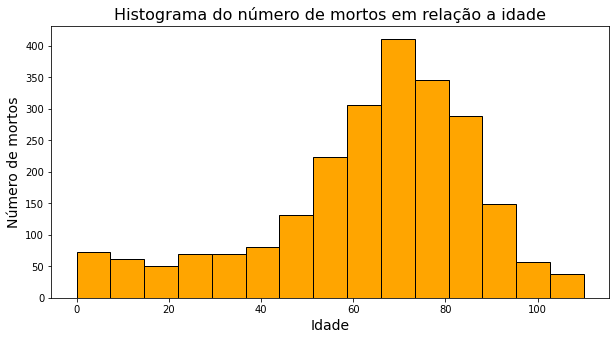

In [ ]:
fig = plt.figure(figsize=(10,5))

#### Histograma com 15 bins
plt.hist(datas_na['DEATHAGE'], bins=15, color='orange', edgecolor='black')

plt.xlabel('Idade', fontsize=14)
plt.ylabel('Número de mortos', fontsize=14)
plt.title('Histograma do número de mortos em relação a idade',fontsize=16)

plt.show()

In [ ]:
#### Tabela equivalente ao histograma anterior
cut = pd.cut(datas_na['DEATHAGE'], 15).value_counts().sort_index().to_frame("Número de Mortos")
cut.index.name = "Faixa de Idade"
cut

,Número de Mortos
Faixa de Idade,
"(-0.11, 7.333]",72
"(7.333, 14.667]",62
"(14.667, 22.0]",56
"(22.0, 29.333]",64
"(29.333, 36.667]",69
"(36.667, 44.0]",94
"(44.0, 51.333]",117
"(51.333, 58.667]",224
"(58.667, 66.0]",365


#### Gráfico de Dispersão (Scatter Plot) da idade dos pacientes quando faleceram











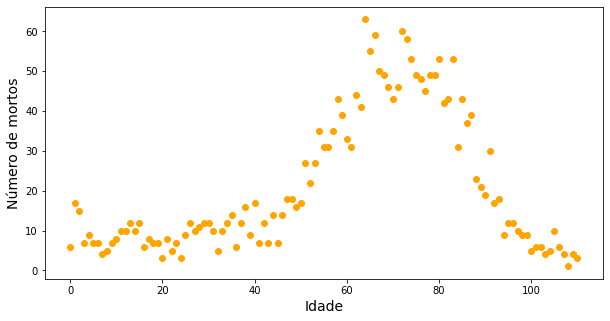

In [ ]:
fig = plt.figure(figsize=(10,5))

### Plot do gráfico de dispersão (Adicionado em 10/12/2022)
death_count = datas_na['DEATHAGE'].value_counts().sort_index()

plt.scatter(death_count.index, death_count.values, color="orange")

plt.xlabel('Idade', fontsize=14)
plt.ylabel('Número de mortos', fontsize=14)

plt.show()

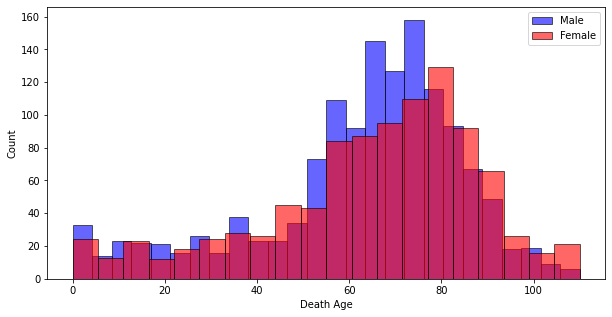

In [ ]:
fig = plt.figure(figsize=(10,5))

plt.hist(datas_na[datas_na["GENDER"] == "M"]["DEATHAGE"], bins="auto", color='blue', edgecolor='black', alpha=0.6, label="Male")
plt.hist(datas_na[datas_na["GENDER"] == "F"]["DEATHAGE"], bins="auto", color='red', edgecolor='black', alpha=0.6, label="Female")

plt.xlabel("Death Age")
plt.ylabel("Count")

plt.legend()
plt.show()

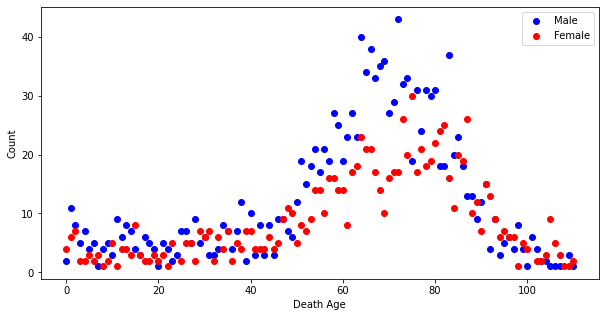

In [ ]:
fig = plt.figure(figsize=(10,5))

male_death_count = datas_na[datas_na["GENDER"] == "M"]["DEATHAGE"].value_counts().sort_index()
female_death_count = datas_na[datas_na["GENDER"] == "F"]["DEATHAGE"].value_counts().sort_index()


plt.scatter(male_death_count.index, male_death_count.values, color="blue", label="Male")
plt.scatter(female_death_count.index, female_death_count.values, color="red", label="Female")


plt.xlabel("Death Age")
plt.ylabel("Count")

plt.legend()
plt.show()